Создайте класс по работе с тригонометрическими функциями. В классе 
должны быть реализованы функции вычисления: 
− косинуса; 
− синуса; 
− тангенса; 
− арксинуса; 
− арккосинуса; 
− арктангенса; 
− перевода из градусов в радианы. 

In [1]:
import math

class Trigonometry:
    def cos(self, angle_rad):
        return math.cos(angle_rad)
    
    def sin(self, angle_rad):
        return math.sin(angle_rad)
    
    def tan(self, angle_rad):
        return math.tan(angle_rad)
    
    def arcsin(self, value):
        return math.asin(value)
    
    def arccos(self, value):
        return math.acos(value)
    
    def arctan(self, value):
        return math.atan(value)
    
    def degrees_to_radians(self, angle_deg):
        return math.radians(angle_deg)

trig = Trigonometry()

angle_deg = 45
angle_rad = trig.degrees_to_radians(angle_deg)

print(f"Косинус {angle_deg}°: {trig.cos(angle_rad)}")
print(f"Синус {angle_deg}°: {trig.sin(angle_rad)}")
print(f"Тангенс {angle_deg}°: {trig.tan(angle_rad)}")

Косинус 45°: 0.7071067811865476
Синус 45°: 0.7071067811865475
Тангенс 45°: 0.9999999999999999


Представьте дерево показанное на рисунке с использованием списка из 
списков. Выведите на печать корень дерева, а также его левое и правое 
поддеревья. 

In [3]:
tree = ["a", 
        ["b", 
            ["d", [], []],  # левое поддерево от "b"
            ["e", [], []]   # правое поддерево от "b"
        ], 
        ["c", 
            [],             # левое поддерево от "c"
            ["f", [], []]   # правое поддерево от "c"
        ]
]

def get_root(tree):
    return tree[0]

def get_left_subtree(tree):
    return tree[1] if len(tree) > 1 else []

def get_right_subtree(tree):
    return tree[2] if len(tree) > 2 else []

print("Корень дерева:", get_root(tree))
print("Левое поддерево:", get_left_subtree(tree))
print("Правое поддерево:", get_right_subtree(tree))

Корень дерева: a
Левое поддерево: ['b', ['d', [], []], ['e', [], []]]
Правое поддерево: ['c', [], ['f', [], []]]


Дан класс, описывающий бинарное дерево. 
class Tree: 
def __init__(self, data): 
self.left = None 
self.right = None 
self.data = data 
def PrintTree(self): 
print(self.data) 
Реализуйте в классе функцию для вставки нового элемента в дерево по 
следующим правилам: 
• Левое поддерево узла содержит только узлы со значениями меньше, 
чем значение в узле. 
• Правое поддерево узла содержит только узлы со значениями меньше, 
чем значение в узле. 
• Каждое из левого и правого поддеревьев также должно быть 
бинарным деревом поиска. 
• Не должно быть повторяющихся узлов. 
Метод вставки сравнивает значение узла с родительским узлом и решает 
куда доваить элемент (в левое или правое поддерево). Перепишите, метод 
PrintTree для печати полной версии дерева.

In [14]:
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

    def insert(self, data):
        if data < self.data:
            if self.left is None:
                self.left = Tree(data)
            else:
                self.left.insert(data)
        elif data > self.data:
            if self.right is None:
                self.right = Tree(data)
            else:
                self.right.insert(data)

    def PrintTree(self, indent=0):
        if self.right:
            self.right.PrintTree(indent + 4)
        
        print(" " * indent + f"{self.data}")
        
        if self.left:
            self.left.PrintTree(indent + 4)


root = Tree(10)
root.insert(6)
root.insert(14)
root.insert(3)
root.insert(8)
root.insert(12)
root.insert(16)

root.PrintTree()


        16
    14
        12
10
        8
    6
        3


Постройте классификатор на основе дерева принятия решений 
следующего датасета

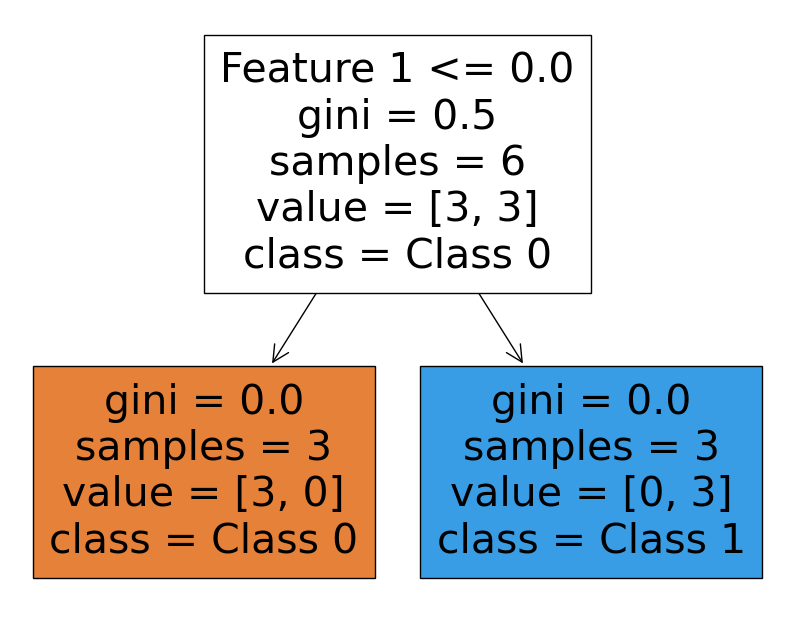

Предсказания для новых данных: [0 1 0]


In [15]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]

clf = DecisionTreeClassifier()
clf.fit(X, target)

plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"], filled=True)
plt.show()

new_data = np.array([[0, 0], [2, 2], [-2, -2]])
predictions = clf.predict(new_data)
print("Предсказания для новых данных:", predictions)

Задание. Постройте модель регрессии для данных из предыдущей рабочей 
тетради.Для примера можно взять потребления газа (в миллионах 
галлонов) в 48 штатах США или набор данных о качестве красного вина: 
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pet
 rol_consumption.csv 
https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine
Quality/master/winequality-red.csv 
Постройте прогноз. Оцените точность модели.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")

X = data.drop("quality", axis=1)
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

sample = X_test.iloc[:5]
sample_predictions = model.predict(sample)
print("\nПримеры прогноза качества вина:")
print("Реальные значения:", y_test.iloc[:5].values)
print("Предсказанные значения:", sample_predictions)

Среднеквадратичная ошибка (MSE): 0.37
Коэффициент детерминации (R²): 0.35

Примеры прогноза качества вина:
Реальные значения: [5 6 5 7 6]
Предсказанные значения: [5.04173718 5.4910668  4.98732119 6.27353474 5.64358855]
